In [40]:
%load_ext autoreload
%autoreload 2

from DarkMatter import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
mass = np.geomspace(200, 1e5, 10)
channel="tt"
for i in range(49):
    
    Likelihood.calcUpperLimits("UMa_II", channel, "EventDisplay", 
                       mass=mass, useBias=True, filename=f"simulation_{channel}_UMa_II_test_b{i}",
                       addTheta=False, DM_spectra="PPPC",
                       averagedIRF=True, ext=True, 
                       correction=True, energyEdges = x[:-1][y!=0]-i,
                       method=2)

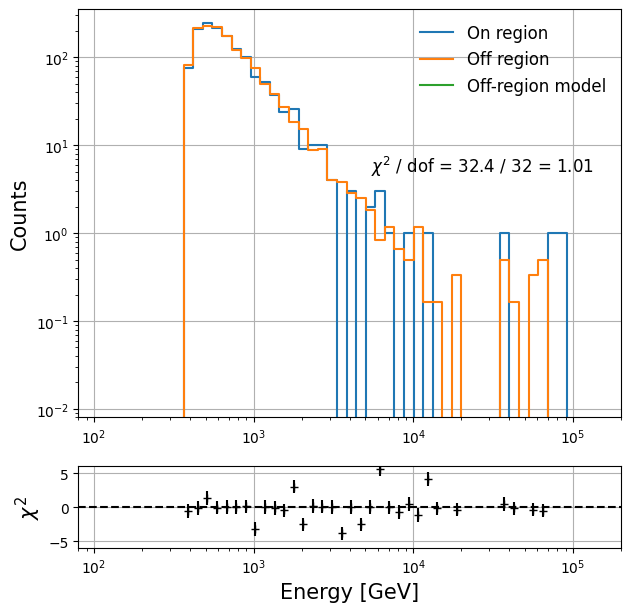

In [31]:
plotData("UMa_II", ext=True, energyEdges=np.logspace(1, 7, 101))

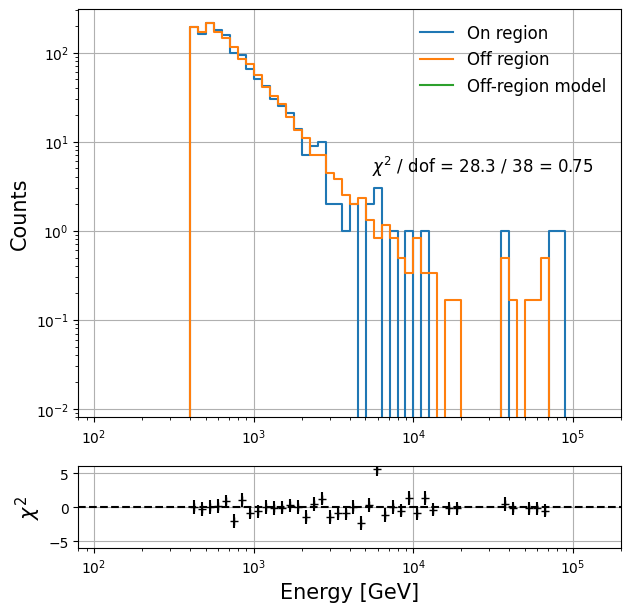

In [30]:
plotData("UMa_II", ext=True, energyEdges=np.logspace(2, 7, 101))

In [20]:
const.OUTPUT_DIR

'/Users/dtak/Research/DarkMatter/Output/'

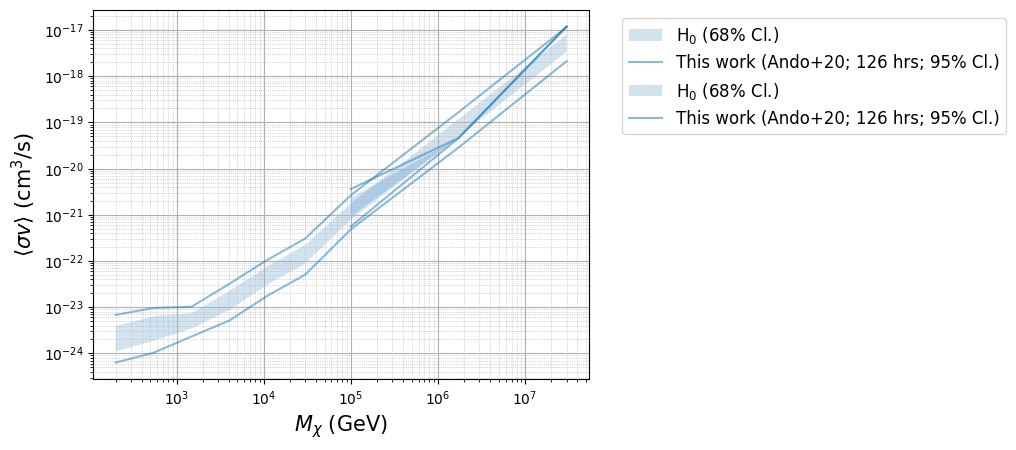

In [28]:
plotExpULcurve("EventDisplay_stacked_sys_uu_1D_final_high_corrected")
plotExpULcurve("EventDisplay_stacked_sys_ee_1D_final")

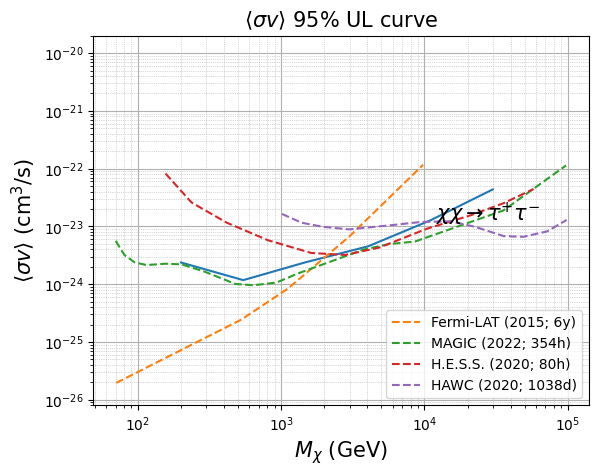

In [24]:
plotULcurve("EventDisplay_stacked_tt_1D_final_test")
plotPublication("tt")

In [2]:
a = ResponseFunction.EventDisplay.readIRFs("Segue_1", ext=True)

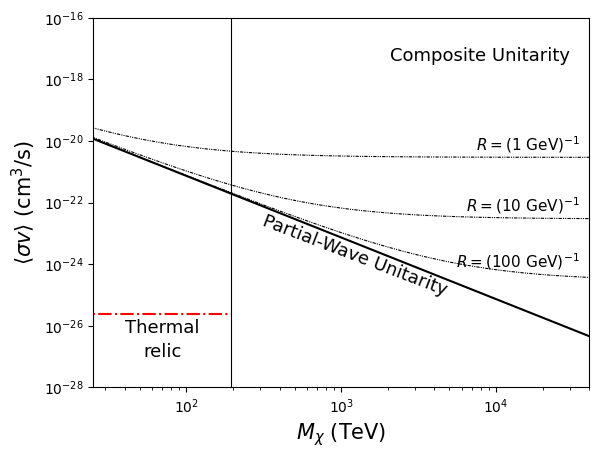

In [7]:
plotUnitarity()

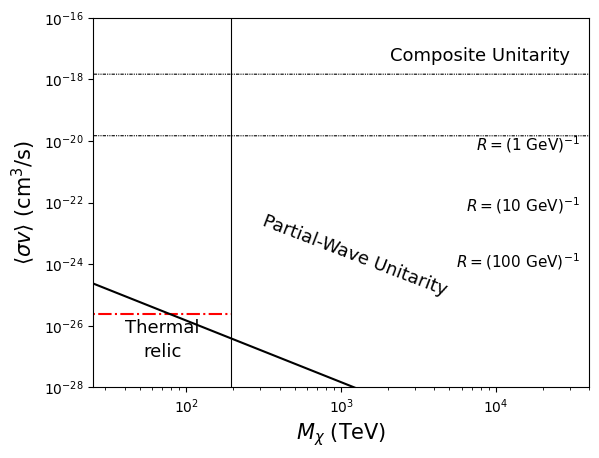

In [12]:
plotUnitarity(vrel=1)

## 1. Instrument Response Function
- mode 0 (default): import IRFs (EA, Edisp, and PSF).
- mode 1: import the averaged effective area.
- mode 2: import the averaged energy dispersion matrix.
- mode 3: import the averaged point spread function.


### 1.1 Import IRF for each run

In [ ]:
dwarf="segue_1"
run = 68296
irf = ResponseFunction.EventDisplay(dwarf, run, mode="all", export=False)

In [ ]:
irf = ResponseFunction.EventDisplay.averagedIRFs("ursa_minor", export=True)

### 1.2 Read IRF from database generated from Step 0.

In [ ]:
dwarf="segue_1"
irf = ResponseFunction.EventDisplay.readIRFs(dwarf, ext=True)

### 1.3 Import averaged IRFs

In [ ]:
dwarf="segue_1"
irf_ext = ResponseFunction.EventDisplay.averagedIRFs(dwarf, version="all", ext=True)

In [ ]:
irf_ext_v6 = ResponseFunction.EventDisplay.averagedIRFs(dwarf, version="v6", ext=True)

In [ ]:
irf = ResponseFunction.EventDisplay.averagedIRFs("segue_1", version="all", ext=False)

### 1.4 Prepare IRFs for quick analysis

In [ ]:
for dwarf in ["segue_1", "draco", "bootes", "ursa_minor"]:
    for v in listOfVersions(dwarf):
        irf = ResponseFunction.EventDisplay.readIRFs(dwarf, version=v, ext=True)

In [ ]:
dwarf = "segue_1"
irf = ResponseFunction.EventDisplay.averagedIRFs(dwarf, ext=False)

In [ ]:
plotRoot(irf.Edisp, logx=True, logy=True)

In [ ]:
plotRoot(irf.Bias)

In [ ]:
energies, bias = getArray(h_bias, return_edges=True)
eb_itp = interp1d(bias, center_pt(energies))

plt.plot(10**center_pt(energies), bias)
plt.xlabel("Reconstructed Energy (TeV)", fontsize=12)
plt.ylabel("Energy Bias", fontsize=12)
plt.axhline(0.2, color="k", ls=":")
plt.text(0.2, 0.14, "20% deviation", fontsize=12)
plt.axvspan(0, 10**eb_itp(0.2), alpha=0.2, color="gray")
plt.xscale("log")

In [141]:
energies, eff = getArray(h_eff, return_edges=True)
ea_itp = interp1d(eff, center_pt(energies))

plt.plot(10**center_pt(energies), eff)
plt.xlabel("Reconstructed Energy (TeV)", fontsize=12)
plt.ylabel("Effective Area [cm$^2$]", fontsize=12)
plt.axhline(max(eff)*0.15, color="k", ls=":")
plt.axvspan(0, 10**ea_itp(max(eff)*0.15), alpha=0.2, color="gray")
plt.text(0.2, 9e3, "15% of its maximum", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.ylim(5e1, 2e5)

### - Quick check: what do they look like? 

In [76]:
from DarkMatter.JProfile.psf import *
from scipy.interpolate import interp1d

for en in [100, 500, 1000, 5000, 10000]:
    psf = getPSFcont(irf.PSF, en, package="EventDisplay")
    psf_itp = interp1d(psf[:,1], psf[:,0])

    etc = plt.plot(psf[:,0], psf[:,1], label="{} GeV".format(en))
    plt.axhline(0.9, color=etc[0].get_color(), ls=":")
    plt.axvline(psf_itp(0.9), color=etc[0].get_color(), ls=":")
plt.axvline(0, ls=":", color="gray", label="90% cont.")
plt.xlabel("Theta [deg]", fontsize=12)
plt.ylabel("PSF containment", fontsize=12)
plt.xscale("log")
plt.legend(fontsize=12, frameon=False, loc=6)
plt.title("PSF ({})".format(dwarf), fontsize=15)

### - Quick check: what do they look like? 

In [ ]:
plotRoot(irf.EA, irf.Edisp, same=False, logx2=True, logy2=True)
print("Total exposure time: {:.2f} hr".format(int(irf.exposure/3600.)))

### - Quick check: Compare with VEGAS
#### 1. Dispersion Matrix

In [ ]:
irf_vegas = ResponseFunction.VEGAS(dwarf)

(<cppyy.gbl.TCanvas object at 0x7fd7ccf8dca0>,
 <cppyy.gbl.TH2D object at 0x7fd7df0b3400>)

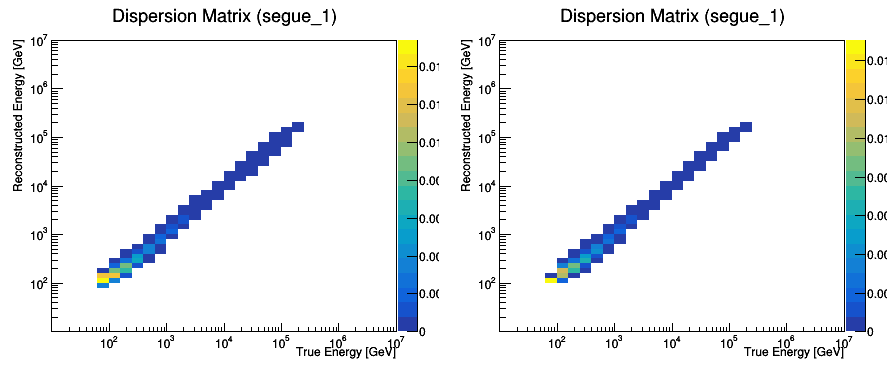

In [6]:
plotRoot(irf.Edisp, irf_ext.Edisp, logx=True, logy=True, logx2=True, logy2=True)

#### 2. Effective Area

(<cppyy.gbl.TCanvas object at 0x7ff40946a290>,
 <cppyy.gbl.TGraph object at 0x7ff3ec3c40d0>)

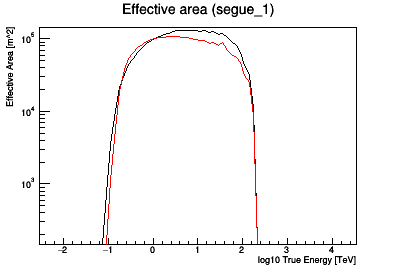

In [14]:
irf = ResponseFunction.EventDisplay.readIRFs(dwarf, version="all")
irf_ext = ResponseFunction.EventDisplay.readIRFs(dwarf, version="all", ext=True)
plotRoot(irf.EA, irf_ext.EA, logy=True)

(<cppyy.gbl.TCanvas object at 0x7f865d02e980>,
 <cppyy.gbl.TH2D object at 0x7f86735f3800>)

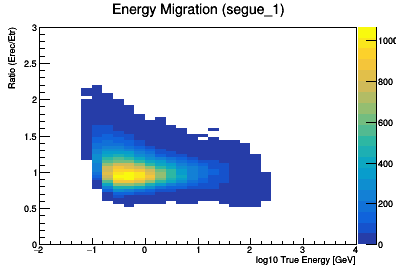

In [47]:
plotRoot(irf.Bias)

## 2. Read dark matter spectra

In [166]:
# options: "tt", "bbar", "ee", "uu", "WW", "ZZ"
spec, m_array = Likelihood.readSpectrum(channel="tt")

### - Quick check: what do they look like?

(<cppyy.gbl.TCanvas object at 0x7fb7e9515850>,
 <cppyy.gbl.TH2D object at 0x7fb7e436e600>)

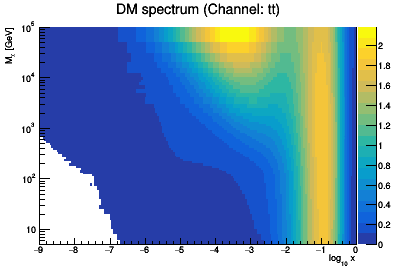

In [191]:
plotRoot(spec, logy=True)

## 3. Read On and Off region data
- Note that there are lower and upper energy cuts (100 GeV $\leq$ E $\leq$ 100 TeV). You can change these cuts; e.g.,  readData(dwarf, eLowerCut=200).

In [6]:
dwarf = "ursa_minor"
hOn, hOff = Likelihood.EventDisplay.readData(dwarf,  ext=True, addTheta=True)

(<cppyy.gbl.TCanvas object at 0x7fd229c70790>,
 <cppyy.gbl.TH2D object at 0x7fd234c4a400>)

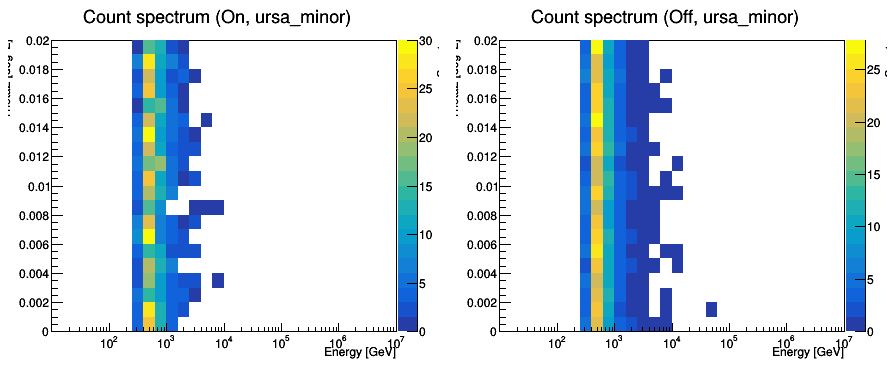

In [7]:
hOn.SetTitle(f"Count spectrum (On, {dwarf})")
hOff.SetTitle(f"Count spectrum (Off, {dwarf})")
plotRoot(hOn, hOff, logx=True, logx2=True)

### 3.1 N(E)

In [104]:
dwarf = "draco"
hOn, hOff= Likelihood.EventDisplay.readData(dwarf, bkgModel=None, ext=True)

In [7]:
evts = Likelihood.EventDisplay.readData("segue_1", bkgModel=None, ext=True, rawdata=True)

#### - Quick check: What does it look like?

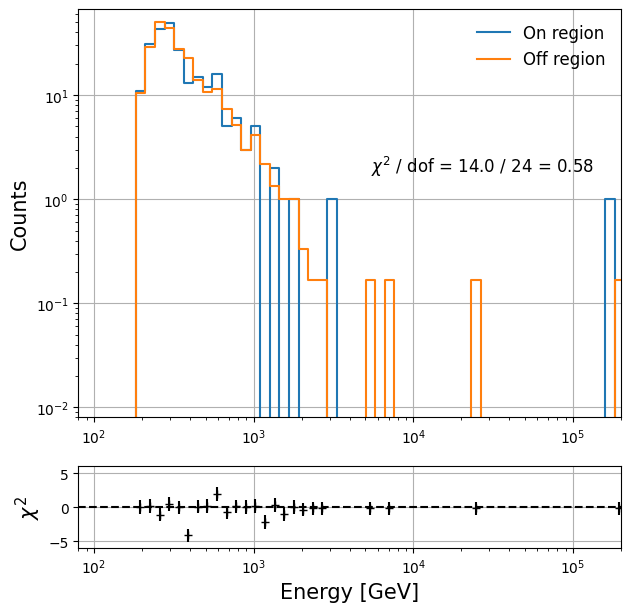

In [26]:
Likelihood.EventDisplay.plotData("Segue_2", version="all", ext=True)

### 3.2 N(E, $\theta$)

(<cppyy.gbl.TCanvas object at 0x7f96f0ebc930>,
 <cppyy.gbl.TH2D object at 0x7f96f2209000>)

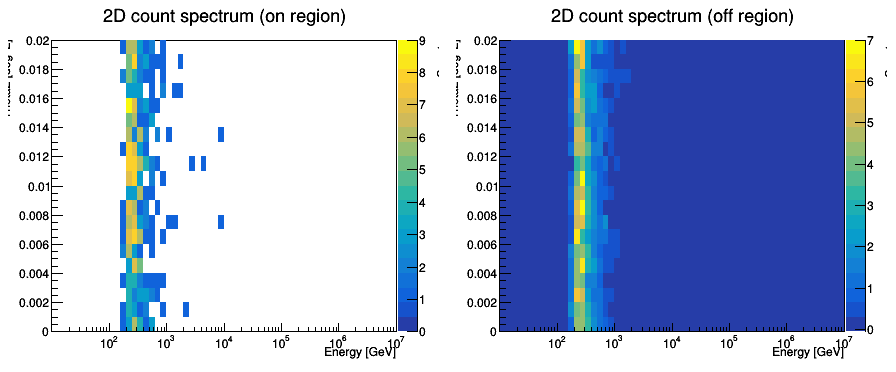

In [15]:
plotRoot(hOn, hOff, logx=True, logx2=True)

## 3. Glance at a signal count spectrum (foleded spectrum)

For EventDisplay, one want to use combinedCalcSignal, instead of calcSignal. Also, for the quick check, averagedIRF is used (default is 'False'). For the details, see [Advanced_Usage_of_IRF](./Advanced_Usage_of_IRF.ipynb)

### - 1D signal, $N(E)$
- Note that this spectrum is not an actual count spectrum. Here, we assume <$\sigma\nu$> = 10$^{-21}$. In other words, 

$N(E) = \frac{<\sigma\nu>T_{obs}}{8\pi M^2} \int \frac{dN}{dE'}J(E')A(E')D(E|E')dE'$

$N_{-21}(E) = \frac{N(E)}{<\sigma\nu>}\times10^{-21}$

This is because <$\sigma\nu$> is a free parameter that we want to estimate with the maximum likelihood analysis.

In [135]:
dwarf = "segue_1"
channel= "tt"
M = 400
version="all"
package="EventDisplay"
seed=defaultNum[dwarf]
channel = "tt"
hg_1d = Likelihood.combinedCalcSignal(dwarf, M, package, channel=channel, ext=True, 
                                      useBias=True, version=version, jArray=True,
                                      jSeed=seed, verbose=True)

[Log] Importing the IRFs (segue_1, EventDisplay, all).
[Log] Importing the DM spectrum (channel: tt).
[Log] Importing the J profile (seed: 295).
[Log] Generating the signal spectrum.
[Log] Done.


Warning in <TROOT::Append>: Replacing existing TH1: hg_1D (Potential memory leak).


(<cppyy.gbl.TCanvas object at 0x7fae66dc11b0>,
 <cppyy.gbl.TH1D object at 0x7fae6f084790>)

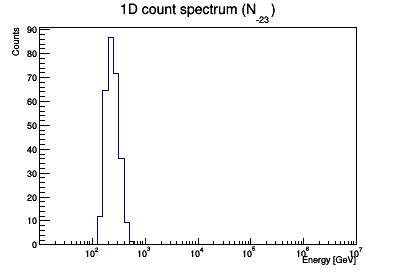

In [136]:
plotRoot(hg_1d, logx=True)

### - 2D signal, $N(E, \theta)$

$N(E, \theta) = \frac{<\sigma\nu>T_{obs}}{8\pi M^2} \int \frac{dN}{dE'}J(E', \theta)A(E')D(E|E')dE'$

$N_{-21}(E, \theta) = \frac{N(E, \theta)}{<\sigma\nu>}\times10^{-21}$

In [61]:
hg_2d = Likelihood.combinedCalcSignal(dwarf, M, package, addTheta=True, channel="tt", ext=True, useBias=True, version=version, jArray=True, jSeed=seed, verbose=True)

[Log] Importing the IRFs (bootes, EventDisplay, all).
[Log] Importing the DM spectrum (channel: tt).
[Log] Importing the J profile (seed: 54).
[Log] Generating the signal spectrum.
[Log] Done.


(<cppyy.gbl.TCanvas object at 0x7ffe92ab8d70>,
 <cppyy.gbl.TH2D object at 0x7ffeb1176200>)

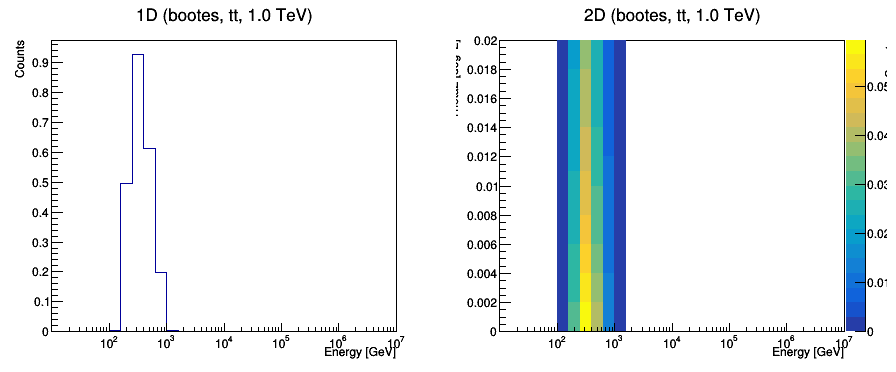

In [62]:
hg_1d.SetTitle(f"1D ({dwarf}, {channel}, {M/1e3} TeV)")
hg_2d.SetTitle(f"2D ({dwarf}, {channel}, {M/1e3} TeV)")
plotRoot(hg_1d, hg_2d, logx=True, logx2=True)

### - Quick check: What do they look like?

[Log] Total signal ratio is 0.00%. They are consistent
[Log] χ²/dof is 0.00/8. They are consistent


(-3.0, 3.0)

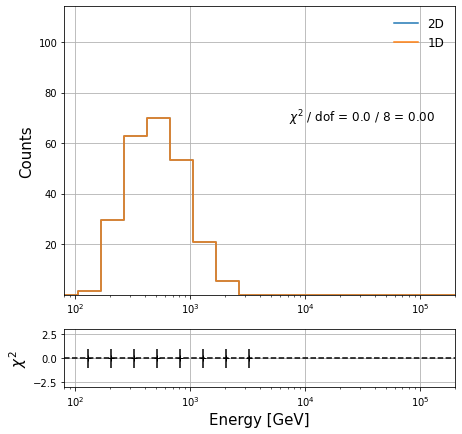

Warning in <TROOT::Append>: Replacing existing TH1: hg (Potential memory leak).


In [27]:
Likelihood.check2Dsignal(hg_1d, hg_2d)              # Compare the total counts from 1D and 2D.
Likelihood.check2Dsignal(hg_1d, hg_2d, chi=True)    # Compare 1D spectra with chi square.

h2to1d = Likelihood.convert2Dsignal(hg_2d)
x1, y1 = getArray(hg_1d)
x2, y2 = getArray(h2to1d)
ax = Likelihood.plotTwoHist(x2, y2, x1, y1, label=["2D", "1D", ""])
ax[0].set_yscale("linear")
ax[1].set_ylim(-3, 3)

## 5. Maximum Likelihood Estimation (MLE)

$$\mathcal{L} = \frac{(g+\alpha b)^{N_{on}}e^{-(g+\alpha b)}}{N_{on}!}\frac{b^{N_{off}}e^{-b}}{N_{off}!}\prod P_i(E_i|M, <\sigma\nu>)$$

$$P_i(E_i|M, <\sigma\nu>) = \frac{\alpha b p_{off}(E_i)+gp_{on}(E_i)}{\alpha b+g}$$

$$p_{on}(E) = \frac{1}{g}\frac{dg}{dE}, \,\,\,\,\text{where}\,\,\frac{dg}{dE}=\frac{<\sigma\nu>T_{obs}}{8\pi M^2} \int \frac{d\Phi}{dE'}J(E')A(E')D(E|E')dE'$$

$$log\mathcal{L} = N_{off}logb-g-(1+\alpha)b+\sum log(\alpha b p_{off, i}+g p_{on, i})$$

### 5.1 1D estimation

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.
[Log] Step 3: A source model is loaded.
[Log] Step 4: A temporary file for minimization is generated.
[Log] Initialization is done. Run minuite.


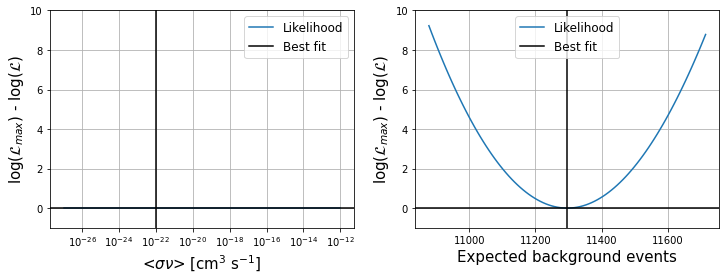

[Log, Error] The upper limit is not estimated (M=0.500 TeV).
[Log, Result] TS = -0.00 (M=500 GeV)
[Log, Result] <σν> (95& upper limit) = 10^(nan) (equivalent to nan)
[Log, Result] b = 11296 +/- 139 (null value: 11296)


In [121]:
dwarf = "segue_1"
M =500
package="EventDisplay"
jSeed=defaultNum[dwarf]
mle_1d = Likelihood.MLE(dwarf, M, channel="tt",
                     package=package,
                     addTheta=False, 
                     averagedIRF=True,
                     ext=True, 
                     useBias=True,
                     jArray=True,
                     jSeed=jSeed,
                     version="all",
                     bkgModel="ex",
                     method=1, statistic="unbinned",
                     verbose=True) 
mle_1d.minuit()

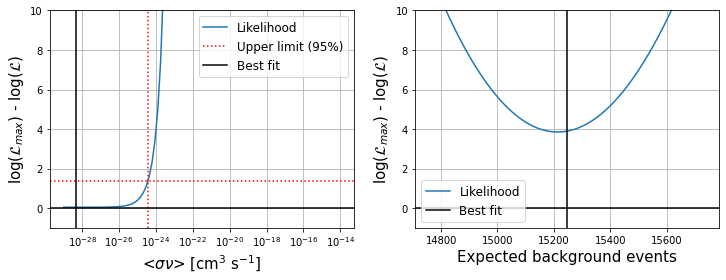

In [42]:
mle_1d.plotProfileLikelihood(invert=True)

### 5.2 2D estimation

In [10]:
dwarf = "segue_1"
M =1000
package="EventDisplay"
channel = "tt"
jSeed=defaultNum[dwarf]
mle_2d = Likelihood.MLE(dwarf, M, channel=channel,
                     package=package,
                     addTheta=True, 
                     averagedIRF=True,
                     ext=True,
                     useBias=True,
                     jArray=True,
                     jSeed=jSeed,
                     version="all",
                     method=2,
                     bkgModel="ex",
                     verbose=True) 

mle_2d.minuit(method=2, fix_b=False)

[Log] Initializing... (EventDisplay)
[Log] Step 1: Instrument response functions are imported.
[Log] Step 2: Events are loaded.


KeyboardInterrupt: 

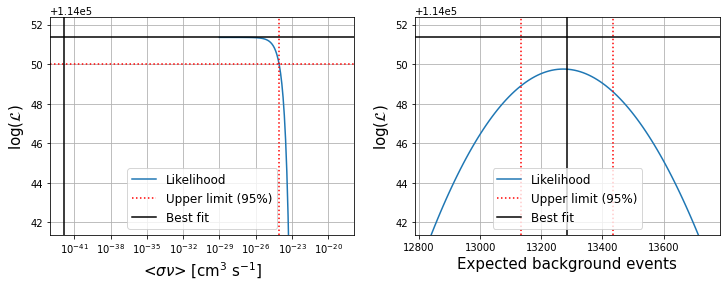

In [15]:
mle_1d.plotProfileLikelihood(invert=False, error=True)

## 6. Generate an upper-limit curve

In [27]:
dwarf = "UMa_II"
channel = "bbar"
package="EventDisplay"
filename=f"EventDisplay_{dwarf}_{channel}_1D_final"

#jSeed=defaultNum[dwarf]


OUTPUT = Likelihood.calcUpperLimits(dwarf, channel, package=package, method=2, filename=filename,
                        averagedIRF=True, statistic="unbinned", 
                        jArray=True, jSeed=1, addTheta=False, version="all", ext=True, 
                        useBias=True, returnMLE=True)

KeyError: 'UMa_II'

## 7. Combined upper limits

In [93]:
for channel in ["tt", "ee", "uu", "WW", "ZZ", "gamma", "bbar"]:
    if channel == "gamma":
        mass = const.mass4gamma
    else:
        mass=np.logspace(2, 4.5, 15)[1:]
    Likelihood.combinedUpperLimits(channel, "EventDisplay", 
                               mass=mass, useBias=True,
                               addTheta=True,
                               averagedIRF=True, ext=True,
                               dwarfs=["segue_1", "ursa_minor", "bootes", "draco"],
                               bkgModel="ex", method=2)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 4
[Log] Channel      : tt
[Log] Dimention    : 1
[Log] Background   : Extrapolation (ex)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 151 GeV
[Log] Maximum mass : 32 TeV


  0%|          | 0/14 [00:00<?, ?it/s]

ValueError: void TMinuit::mnmnos() =>
    ValueError: cannot convert float NaN to integer

Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Po

## 8. Generate an expected-upper-limit curve

In [ ]:
Likelihood.calcExpectedLimits()

In [75]:
dwarf = "Segue_1"
channel = "tt"
mass = np.logspace(np.log10(200), 4.5, 8)
package="EventDisplay"
#filename = "comp_el"
#filename=None
jSeed=defaultNum[dwarf]
uls = []
for i in trange(300):
#    jSeed = np.random.randint(0, 99999)
    filename = "EventDisplay_Segue_1_tt_1D"
    ul = Likelihood.calcUpperLimits(dwarf, channel, mass=mass, package=package, method=2, averagedIRF=True,
                                    filename="EventDisplay_Segue_1_tt_1D_test",
                                  jArray=True, jSeed=jSeed, addTheta=False, version="all", ext=True, bkgModel="gaus",
                                  useBias=True, verbosity=0, returnUL=True, write=True, events=events,
                                  N_on= N_on_poi, hOn=hOn, expectedLimit=True)
    uls.append(ul)

  0%|          | 0/300 [00:00<?, ?it/s]

KeyboardInterrupt: 

## 9. Estimate systematic errors on upper limits

[Log] Package      : EventDisplay
[Log] Dwarf        : Bootes_I
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Bootes_I_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : ComBer
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_ComBer_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : CVn_I
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_CVn_I_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : CVn_II
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_CVn_II_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Draco_II
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Draco_II_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Hercules
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Hercules_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_I
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_I_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_II
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_II_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_IV
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

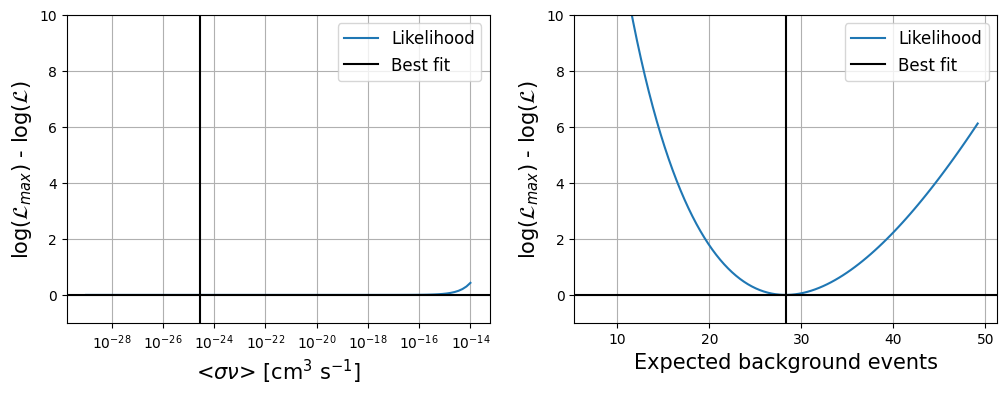

[Log, Error] The upper limit is not estimated (M=31622.777 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_IV_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_V
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

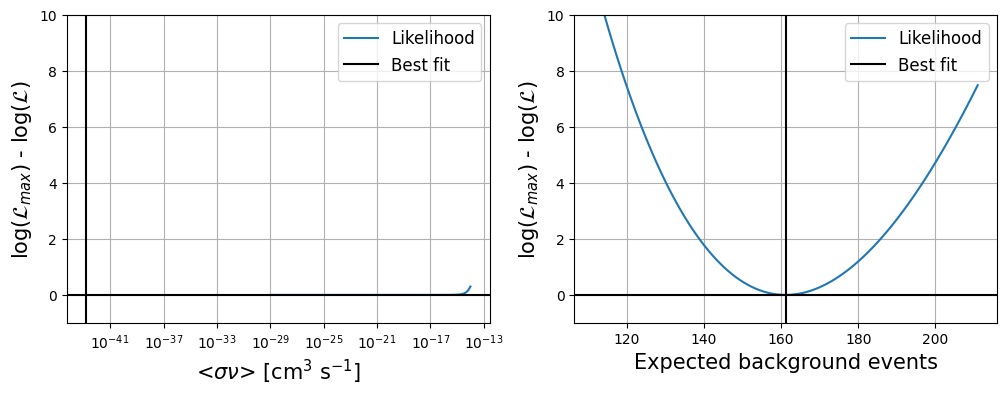

[Log, Error] The upper limit is not estimated (M=31622.777 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_V_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_1
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Segue_1_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_2
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Segue_2_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Sextans
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Sextans_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Triangulum_II
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_Triangulum_II_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_I
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_UMa_I_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_II
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.008)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_UMa_II_ee_1D_gaus.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMi
[Log] Channel      : ee
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 31623 GeV
[Log] Maximum mass : 31623 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_UMi_ee_1D_gaus.npy'


cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_CVn_I_ee_1D_gaus.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_CVn_II_ee_1D_gaus.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_Draco_II_ee_1D_gaus.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_Hercules_ee_1D_gaus.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_I_ee_1D_gaus.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_II_ee_1D_gaus.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_IV_ee_1D_gaus.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_Leo_V_ee_1D_gaus.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_Segue_1_ee_1D_gaus.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/EventDispl

In [122]:
channel = "ee"
mass = np.logspace(4.5, 7.5, 10)
package="EventDisplay"

for dwarf in const.ListOfDwarf:
#    filename=f"{package}_{dwarf}_{channel}_2D_final"
    Likelihood.calcUpperLimits(dwarf, channel, package=package, method=2, ext=True, DM_spectra="HDM",
                            mass=mass, addTheta=False, averagedIRF=True, useBias=True, 
                            correction=True, bkgModel="gaus", )#filename=filename)


In [3]:
package="EventDisplay"
#mass = np.geomspace(200, 9e4, 6)
mass = np.geomspace(1e5, 3e7, 5)
for c in ["gamma"]:
    print(c)
    filename=f"EventDisplay_stacked_{c}_1D_gaus_high"
    OUTPUT = Likelihood.combinedUpperLimits(c, package=package, method=2, DM_spectra="HDM", filename=filename,
                averagedIRF=True, bkgModel="gaus", mass=mass, dwarfs = const.ListOfDwarf,
                addTheta=False, version="all", ext=True, correction=True)
    

gamma
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : gamma
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 100000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/12 [00:00<?, ?it/s]

-21
-21
-21
-21
-21
-21
-21
-21
-21
-21
-21
-21
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_stacked_gamma_1D_gaus_high.npy'


cp: /Users/dtak/Research/DarkMatter/Output/EventDisplay_stacked_gamma_1D_gaus_high.npy: No such file or directory


In [52]:
package="EventDisplay"
mass = np.geomspace(200, 3e4, 6)
#mass = np.geomspace(3e4, 3e7, 5)
for c in const.ListOfChannel:

    filename=f"EventDisplay_stacked_exp_{c}_1D_gaus_low_c"
    OUTPUT = Likelihood.combinedExpectedUpperLimits(c, package=package, method=2, DM_spectra="PPPC", filename=filename,
                averagedIRF=True, bkgModel="gaus", mass=mass, dwarfs = const.ListOfDwarf,
                addTheta=False, version="all", ext=True, correction=True)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : ee
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/1800 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_stacked_exp_ee_1D_gaus_low_c.npy'
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : uu
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/1800 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_stacked_exp_uu_1D_gaus_low_c.npy'
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : tt
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/1800 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).


AbortSignal: void TMinuit::mnexcm(const char* comand, double* plist, int llist, int& ierflg) =>
    AbortSignal: abort from C++; program state was reset

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

[/opt/local/libexec/root6/lib/root/libCore.6.26.08.so] TUnixSystem::DispatchSignals(ESignals) (no debug info)
[/usr/lib/system/libsystem_platform.dylib] _sigtramp (no debug info)
[/usr/lib/system/libsystem_pthread.dylib] pthread_kill (no debug info)
[/usr/lib/system/libsystem_c.dylib] abort (no debug info)
[/usr/lib/libc++abi.dylib] __cxxabiv1::__aligned_malloc_with_fallback(unsigned long) (no debug info)
[/usr/lib/libc++abi.dylib] demangling_terminate_handler() (no debug info)
[/usr/lib/libobjc.A.dylib] _objc_terminate() (no debug info)
[/usr/lib/libc++abi.dylib] std::__

libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyException: python exception
 *** Break *** abort
libc++abi: terminating with uncaught exception of type CPyCppyy::PyExcep

In [ ]:
package="EventDisplay"
#mass = np.geomspace(200, 3e4, 6)
mass = np.geomspace(3e4, 3e7, 5)
for c in const.ListOfChannel:

    filename=f"EventDisplay_stacked_exp_{c}_1D_gaus_high_c"
    OUTPUT = Likelihood.combinedExpectedUpperLimits(c, package=package, method=2, DM_spectra="HDM", filename=filename,
                averagedIRF=True, bkgModel=None, mass=mass, dwarfs = const.ListOfDwarf,
                addTheta=False, version="all", ext=True, correction=True, runs=300)
    break

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : ee
[Log] Dimention    : 1
[Log] Background   : None
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/1500 [00:00<?, ?it/s]

-22.93981927057215
-22.939830905369515
-22.939837177186703
-22.939823023061052
-1
-1
-1
-1


In [116]:
OUTPUT = Likelihood.combinedUpperLimits("tt", package=package, method=2, DM_spectra="PPPC", filename="for_comparision_stacked",
                averagedIRF=True, bkgModel="gaus", mass=mass, dwarfs = ["Segue_1", "UMi", "Draco_II", "Bootes_I"], general=True, jSeed="b",
                addTheta=False, version="all", ext=True, correction=True)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 4
[Log] Channel      : tt
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/for_comparision_stacked.npy'


Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Po

[Log] Package      : EventDisplay
[Log] Dwarf        : Bootes_I
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Bootes_I_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : ComBer
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/ComBer_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : CVn_I
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/CVn_I_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : CVn_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/CVn_II_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Draco_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Draco_II_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Hercules
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Hercules_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_I
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Leo_I_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Leo_II_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_IV
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

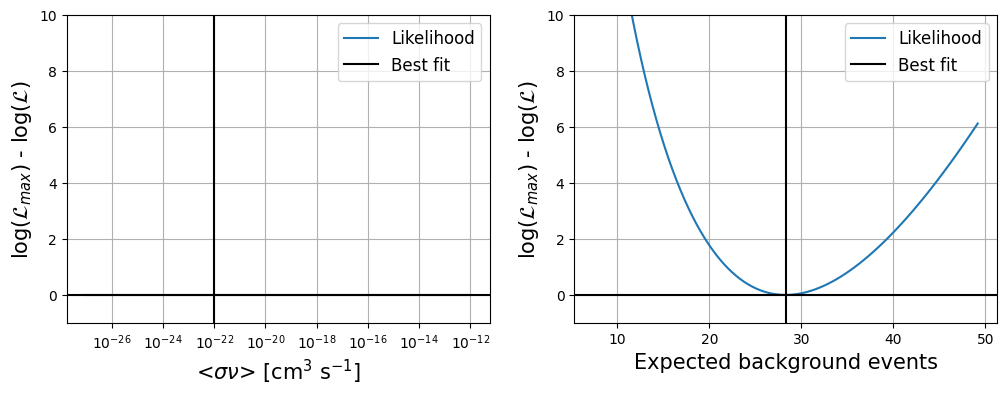

[Log, Error] The upper limit is not estimated (M=0.200 TeV).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Leo_IV_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_V
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Leo_V_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_1
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Segue_1_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_2
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Segue_2_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Sextans
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Sextans_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Triangulum_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Triangulum_II_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_I
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/UMa_I_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.008)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/UMa_II_individual_bbar_low.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMi
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/UMi_individual_bbar_low.npy'


cp: /Users/dtak/Research/DarkMatter/Output/Bootes_I_individual_bbar_low.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/ComBer_individual_bbar_low.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/CVn_I_individual_bbar_low.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/CVn_II_individual_bbar_low.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Draco_II_individual_bbar_low.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Hercules_individual_bbar_low.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Leo_I_individual_bbar_low.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Leo_II_individual_bbar_low.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Leo_IV_individual_bbar_low.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Leo_V_individual_bbar_low.npy: No such file 

In [165]:
mass = np.geomspace(200, 3e4, 10)
for dwarf in const.ListOfDwarf:
    OUTPUT = Likelihood.calcUpperLimits(dwarf, "bbar", package=package, method=2, DM_spectra="PPPC",
                averagedIRF=True, bkgModel="gaus", mass=mass, 
                filename=f"{dwarf}_individual_bbar_low",
                addTheta=False, version="all", ext=True, correction=True)

In [181]:
mass = np.geomspace(200, 3e4, 10)

Likelihood.combinedUpperLimits("tt", package=package, method=2, DM_spectra="PPPC",
                averagedIRF=True, bkgModel="gaus", mass=mass, dwarfs=const.ListOfDwarf,
                filename=f"stacked_combined_tt_low_corrected",
                addTheta=False, version="all", ext=True, correction=True)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : tt
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/stacked_combined_tt_low.npy'


Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Po

In [173]:
OUTPUT = Likelihood.calcUpperLimits("Segue_1", "tt", package="EventDisplay", method=2, 
                averagedIRF=True, bkgModel="gaus", mass = np.geomspace(200, 3e4, 10),
                filename=f"for_comparision_segue_1_new", jSeed= defaultNum["Segue_1"],
                addTheta=False, version="all", ext=True, correction=True)

[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_1
[Log] Channel      : tt
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/10 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/for_comparision_segue_1_new.npy'


In [157]:
u = np.load(const.OUTPUT_DIR+"for_comparision_segue_1_t_50.npy")
u1 = np.load(const.OUTPUT_DIR+"for_comparision_segue_1_t_100.npy")
u2 = np.load(const.OUTPUT_DIR+"for_comparision_segue_1_t_200.npy")
u4 = np.load(const.OUTPUT_DIR+"for_comparision_segue_1_t_400.npy")

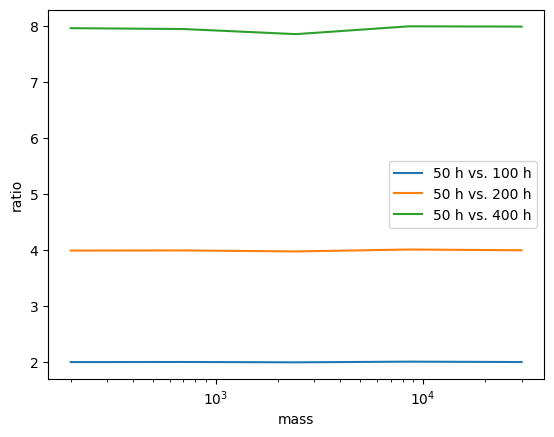

In [165]:
plt.plot(u[:,0], 10**u[:,1]/10**u1[:,1], label="50 h vs. 100 h")
plt.plot(u[:,0], 10**u[:,1]/10**u2[:,1], label="50 h vs. 200 h")
plt.plot(u[:,0], 10**u[:,1]/10**u4[:,1], label="50 h vs. 400 h")
plt.legend()
plt.xlabel("mass")
plt.ylabel("ratio")
plt.xscale("log")

In [166]:
mass = np.geomspace(3e4, 3e7, 5)
for dwarf in const.ListOfDwarf:
    OUTPUT = Likelihood.calcUpperLimits(dwarf, "bbar", package=package, method=2, DM_spectra="HDM",
                averagedIRF=True, bkgModel="gaus", mass=mass, 
                filename=f"{dwarf}_individual_bbar_high",
                addTheta=False, version="all", ext=True, correction=True)

[Log] Package      : EventDisplay
[Log] Dwarf        : Bootes_I
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Bootes_I_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : ComBer
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/ComBer_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : CVn_I
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/CVn_I_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : CVn_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/CVn_II_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Draco_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Draco_II_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Hercules
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Hercules_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_I
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Leo_I_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Leo_II_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_IV
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Leo_IV_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Leo_V
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Leo_V_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_1
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Segue_1_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_2
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Segue_2_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Sextans
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Sextans_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : Triangulum_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/Triangulum_II_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_I
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.02)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/UMa_I_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMa_II
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.008)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/UMa_II_individual_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] Dwarf        : UMi
[Log] Channel      : bbar
[Log] Dataset      : Extended (theta2=0.012)
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/UMi_individual_bbar_high.npy'


cp: /Users/dtak/Research/DarkMatter/Output/Bootes_I_individual_bbar_high.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/ComBer_individual_bbar_high.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/CVn_I_individual_bbar_high.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/CVn_II_individual_bbar_high.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Draco_II_individual_bbar_high.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Hercules_individual_bbar_high.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Leo_I_individual_bbar_high.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Leo_II_individual_bbar_high.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Leo_IV_individual_bbar_high.npy: No such file or directory
cp: /Users/dtak/Research/DarkMatter/Output/Leo_V_individual_bbar_high.npy: No 

In [2]:
mass = np.geomspace(3e4, 3e7, 5)
package="EventDisplay"
for c in const.ListOfChannel:
    Likelihood.combinedUpperLimits(c, package=package, method=2, DM_spectra="HDM",
                    averagedIRF=True, bkgModel="gaus", mass=mass, dwarfs=const.ListOfDwarf,
                    filename=f"stacked_combined_{c}_high",
                    addTheta=False, version="all", ext=True, correction=True)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : ee
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/stacked_combined_ee_high.npy'
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : uu
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/stacked_combined_uu_high.npy'
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : tt
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/stacked_combined_tt_high.npy'
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : ttbar
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/stacked_combined_ttbar_high.npy'
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : bbar
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/stacked_combined_bbar_high.npy'
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : WW
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

Negative dN/dx values were set to 0 for the following x:
[0.99506956]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99506956]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99506956]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99506956]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99506956]
Caution around these values should be taken
A comparison with linear interpolation is recommended
Negative dN/dx values were set to 0 for the following x:
[0.99506956]
Caution around these values should be taken
A comparison with linear interpolation is reco

  0%|          | 0/5 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/stacked_combined_ZZ_high.npy'
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : gamma
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/15 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/stacked_combined_gamma_high.npy'
[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : nue
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 30000 GeV
[Log] Maximum mass : 30000 TeV


  0%|          | 0/5 [00:00<?, ?it/s]

[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Error] MIGRAD is NOT converged. Check initial parameters (minuit in mle.py).
[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/stacked_combined_nue_high.npy'


Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Po

Text(0.5, 1.0, '')

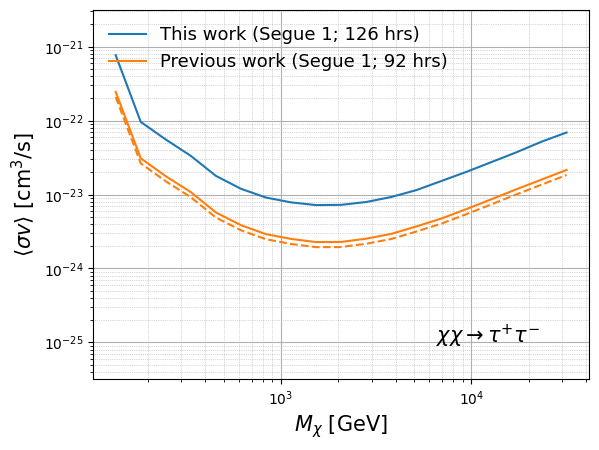

In [139]:
Likelihood.plotULcurve("for_comparision_segue_1", label="This work (Segue 1; 126 hrs)")
Likelihood.plotULcurve("for_comparision_segue_1_old", label="Previous work (Segue 1; 92 hrs)")
Likelihood.plotULcurve("for_comparision_segue_1_old", factor=np.sqrt(126.29/92), ls="--", color="tab:orange")
plt.legend(loc=2, fontsize=13, frameon=False)
ax = plt.gca()
plt.text(0.9, 0.1, r"$\chi\chi \rightarrow \tau^{+}\tau^{-}$", fontsize=15, ha="right", transform=ax.transAxes)

plt.title("")

In [5]:
import numpy as np

In [145]:
new = np.load(const.OUTPUT_DIR+"for_comparision_segue_1_new.npy")
old = np.load(const.OUTPUT_DIR+"for_comparision_segue_1_old.npy")

In [147]:
10**new/10**old

/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_61579/55698690.py:1: RuntimeWarning: overflow encountered in power
  10**new/10**old
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_61579/55698690.py:1: RuntimeWarning: invalid value encountered in divide
  10**new/10**old


array([[1.        ,        nan],
       [1.        , 3.13526561],
       [1.        , 3.10571427],
       [1.        , 3.14089422],
       [       nan, 3.09540737],
       [       nan, 3.1249483 ],
       [       nan, 3.10736   ],
       [       nan, 3.12681115],
       [       nan, 3.12010675],
       [       nan, 3.1604499 ],
       [       nan, 3.16070281],
       [       nan, 3.13493948],
       [       nan, 3.15629482],
       [       nan, 3.11443241],
       [       nan, 3.21913244],
       [       nan, 3.19239322],
       [       nan, 3.18094959],
       [       nan, 3.16449765],
       [       nan, 3.25709636],
       [       nan, 3.20816552]])

In [134]:
new/old

array([[1.        ,        nan],
       [1.        , 0.97703771],
       [1.        , 0.97813577],
       [1.        , 0.97818001],
       [1.        , 0.97863337],
       [1.        , 0.9787091 ],
       [1.        , 0.97897151],
       [1.        , 0.97896011],
       [1.        , 0.9790611 ],
       [1.        , 0.97884144],
       [1.        , 0.9787719 ],
       [1.        , 0.97897659],
       [1.        , 0.97878856],
       [1.        , 0.97902127],
       [1.        , 0.97824153],
       [1.        , 0.97829045],
       [1.        , 0.97820747],
       [1.        , 0.97818865],
       [1.        , 0.97750531],
       [1.        , 0.97766564]])

In [150]:
old_j/new_j

3.3133655523400085

In [148]:
new_j = JProfile.calcJval("Segue_1", seed = defaultNum["Segue_1"], deg=np.sqrt(0.012))
old_j = JProfile.calcJval("Segue_1", seed = "b", general=True, deg=np.sqrt(0.012))

In [123]:
j, etc = JProfile.generateConvolvedJ("Segue_1", seed = defaultNum["Segue_1"], th2Cut=0.012, return_array=True)

  0%|          | 0/30 [00:00<?, ?it/s]

In [151]:
np.sqrt(3.1)

1.760681686165901

In [125]:
j_o/j

/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_61579/3852905278.py:1: RuntimeWarning: invalid value encountered in divide
  j_o/j


array([[1.        ,        nan],
       [1.        , 2.97897019],
       [1.        , 3.04785677],
       [1.        , 3.10116309],
       [1.        , 3.16010036],
       [1.        , 3.20176816],
       [1.        , 3.22894668],
       [1.        , 3.24818535],
       [1.        , 3.26528964],
       [1.        , 3.27681249],
       [1.        , 3.28485271],
       [1.        , 3.29287823],
       [1.        , 3.30436669],
       [1.        , 3.30611601],
       [1.        , 3.31339083],
       [1.        , 3.31134805],
       [1.        , 3.31570958],
       [1.        , 3.31464629],
       [1.        , 3.32950112],
       [1.        , 3.32950112]])

In [122]:
j_o, etc = JProfile.generateConvolvedJ("Segue_1", seed ="b",general=True, th2Cut=0.012, return_array=True)

  0%|          | 0/30 [00:00<?, ?it/s]

In [119]:
old_j/new_j

3.3133655523400085

In [117]:
10**new/10**old

/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_61579/55698690.py:1: RuntimeWarning: overflow encountered in power
  10**new/10**old
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_61579/55698690.py:1: RuntimeWarning: invalid value encountered in divide
  10**new/10**old


array([[1.        , 3.1626253 ],
       [       nan, 3.16887901],
       [       nan, 3.11086713],
       [       nan, 3.1056706 ],
       [       nan, 3.17961339],
       [       nan, 3.12959112],
       [       nan, 3.14546332],
       [       nan, 3.21326405],
       [       nan, 3.16806678],
       [       nan, 3.20010664]])

In [45]:
const.ListOfDwarf

['Bootes_I',
 'ComBer',
 'CVn_I',
 'CVn_II',
 'Draco_II',
 'Hercules',
 'Leo_I',
 'Leo_II',
 'Leo_IV',
 'Leo_V',
 'Segue_1',
 'Segue_2',
 'Sextans',
 'Triangulum_II',
 'UMa_I',
 'UMa_II',
 'UMi']

In [46]:
text = '''Carina	1.26	$0.15^{+0.15}_{-0.07}$	$0.46^{+0.16}_{-0.12}$	$17.92^{+0.19}_{-0.11}$	$17.87^{+0.10}_{-0.09}$	$18.15^{+0.34}_{-0.25}$	$17.90^{+0.17}_{-0.16}$	
Draco	1.30	$0.40^{+0.16}_{-0.15}$	$0.64^{+0.06}_{-0.14}$	$19.05^{+0.22}_{-0.21}$	$18.84^{+0.12}_{-0.13}$	$18.97^{+0.17}_{-0.24}$	$18.53^{+0.10}_{-0.12}$	
Fornax	2.61	$0.13^{+0.04}_{-0.05}$	$0.31^{+0.08}_{-0.05}$	$17.84^{+0.11}_{-0.06}$	$17.83^{+0.12}_{-0.06}$	$17.99^{+0.11}_{-0.08}$	$17.86^{+0.04}_{-0.05}$	
Leo_I	0.45	$0.13^{+0.05}_{-0.05}$	$0.22^{+0.02}_{-0.04}$	$17.84^{+0.20}_{-0.16}$	$17.84^{+0.20}_{-0.16}$	$17.91^{+0.15}_{-0.20}$	$17.91^{+0.15}_{-0.20}$	
Leo_II	0.23	$0.04^{+0.05}_{-0.02}$	$0.09^{+0.03}_{-0.05}$	$17.97^{+0.20}_{-0.18}$	$17.97^{+0.20}_{-0.18}$	$17.24^{+0.35}_{-0.48}$	$17.24^{+0.35}_{-0.48}$	
Sculptor	1.94	$0.15^{+0.05}_{-0.05}$	$0.48^{+0.14}_{-0.11}$	$18.57^{+0.07}_{-0.05}$	$18.54^{+0.06}_{-0.05}$	$18.47^{+0.16}_{-0.14}$	$18.19^{+0.07}_{-0.06}$	
Sextans	1.70	$0.58^{+0.32}_{-0.47}$	$0.87^{+0.10}_{-0.53}$	$17.92^{+0.35}_{-0.29}$	$17.52^{+0.28}_{-0.18}$	$18.56^{+0.25}_{-0.73}$	$17.89^{+0.13}_{-0.23}$	
UMi	1.37	$0.06^{+0.07}_{-0.03}$	$0.25^{+0.14}_{-0.09}$	$18.95^{+0.26}_{-0.18}$	$18.93^{+0.27}_{-0.19}$	$18.13^{+0.26}_{-0.18}$	$18.03^{+0.16}_{-0.13}$	
Bootes_I	0.47	$0.22^{+0.05}_{-0.10}$	$0.26^{+0.02}_{-0.04}$	$18.24^{+0.40}_{-0.37}$	$18.24^{+0.40}_{-0.37}$	$17.90^{+0.23}_{-0.26}$	$17.90^{+0.23}_{-0.26}$	
ComBer	0.31	$0.16^{+0.02}_{-0.05}$	$0.17^{+0.01}_{-0.02}$	$19.02^{+0.37}_{-0.41}$	$19.02^{+0.37}_{-0.41}$	$17.96^{+0.20}_{-0.25}$	$17.96^{+0.20}_{-0.25}$	
CVn_I	0.53	$0.11^{+0.15}_{-0.09}$	$0.23^{+0.07}_{-0.17}$	$17.44^{+0.37}_{-0.28}$	$17.43^{+0.37}_{-0.28}$	$17.57^{+0.37}_{-0.73}$	$17.57^{+0.36}_{-0.72}$	
CVn_II	0.13	$0.07^{+0.01}_{-0.02}$	$0.07^{+0.00}_{-0.01}$	$17.65^{+0.45}_{-0.43}$	$17.65^{+0.45}_{-0.43}$	$16.97^{+0.24}_{-0.23}$	$16.97^{+0.24}_{-0.23}$	
Hercules	0.28	$0.07^{+0.08}_{-0.06}$	$0.12^{+0.03}_{-0.09}$	$16.86^{+0.74}_{-0.68}$	$16.86^{+0.74}_{-0.68}$	$16.66^{+0.42}_{-0.40}$	$16.66^{+0.42}_{-0.40}$	
Leo_IV	0.16	$0.05^{+0.03}_{-0.04}$	$0.08^{+0.01}_{-0.06}$	$16.32^{+1.06}_{-1.69}$	$16.32^{+1.06}_{-1.69}$	$16.12^{+0.71}_{-1.14}$	$16.12^{+0.71}_{-1.14}$	
Leo_V	0.07	$0.03^{+0.01}_{-0.02}$	$0.04^{+0.00}_{-0.01}$	$16.37^{+0.94}_{-0.87}$	$16.37^{+0.94}_{-0.87}$	$15.86^{+0.46}_{-0.47}$	$15.86^{+0.46}_{-0.47}$	
Leo_T	0.08	$0.03^{+0.01}_{-0.02}$	$0.04^{+0.00}_{-0.01}$	$17.11^{+0.44}_{-0.39}$	$17.11^{+0.44}_{-0.39}$	$16.48^{+0.22}_{-0.25}$	$16.48^{+0.22}_{-0.25}$	
Segue_1	0.35	$0.13^{+0.05}_{-0.07}$	$0.18^{+0.01}_{-0.05}$	$19.36^{+0.32}_{-0.35}$	$19.36^{+0.32}_{-0.35}$	$17.99^{+0.20}_{-0.31}$	$17.99^{+0.20}_{-0.31}$	
Segue_2	0.19	$0.07^{+0.03}_{-0.05}$	$0.10^{+0.01}_{-0.05}$	$16.21^{+1.06}_{-0.98}$	$16.21^{+1.06}_{-0.98}$	$15.89^{+0.56}_{-0.37}$	$15.89^{+0.56}_{-0.37}$	
UMa_I	0.43	$0.15^{+0.08}_{-0.12}$	$0.22^{+0.03}_{-0.14}$	$17.87^{+0.56}_{-0.33}$	$17.87^{+0.56}_{-0.33}$	$17.61^{+0.20}_{-0.38}$	$17.61^{+0.20}_{-0.38}$	
UMa_II	0.53	$0.24^{+0.06}_{-0.11}$	$0.29^{+0.02}_{-0.04}$	$19.42^{+0.44}_{-0.42}$	$19.42^{+0.44}_{-0.42}$	$18.39^{+0.25}_{-0.27}$	$18.38^{+0.25}_{-0.27}$	'''

In [50]:
gs = []
new_t = text.split()
for i, t in enumerate(new_t):
    if i % 8 ==0:
        gs.append([t, new_t[i+1], new_t[i+4], new_t[i+5]])

In [55]:
JProfile.calcJval()

TypeError: calcJval() missing 1 required positional argument: 'dwarf'

In [56]:
const.ListOfDwarf

['Bootes_I',
 'ComBer',
 'CVn_I',
 'CVn_II',
 'Draco_II',
 'Hercules',
 'Leo_I',
 'Leo_II',
 'Leo_IV',
 'Leo_V',
 'Segue_1',
 'Segue_2',
 'Sextans',
 'Triangulum_II',
 'UMa_I',
 'UMa_II',
 'UMi']

In [110]:
text2 = '''B\"ootes& 13.98 & 0.8 & 0.02 &         7.0$^{+11.2}_{-4.3}\times10^{-2}$ &3.1$^{+2.9}_{-1.4}\times10^{2}$&2.1$^{+4.0}_{-1.2}$&$17.77_{-0.24}^{+0.23}$&
    Coma Berenices& 39.76& -0.2 & 0.012 &7.9$^{+12.6}_{-4.9}\times10^{-2}$ &3.5$^{+3.9}_{-1.8}\times10^{2}$&2.7$^{+5.4}_{-1.7}$&$18.37_{-0.33}^{+0.30}$&
    CVn I&9.72&0.3 & 0.02             &4.7$^{+6.5}_{-2.7}\times10^{-2}$  &6.4$^{+4.7}_{-2.6}\times10^{2}$&6.0$^{+6.9}_{-3.1}$&$17.38_{-0.11}^{+0.11}$&
    CVn II&8.14&1.6 & 0.02            &8.4$^{+14.0}_{-5.2}\times10^{-2}$ &3.1$^{+3.7}_{-1.7}\times10^{2}$&2.3$^{+5.1}_{-1.5}$&$17.19_{-0.47}^{+0.37}$&
    Draco II& 8.02&0.0 & 0.02         &5.9$^{+7.4}_{-3.2}\times10^{-2}$  &7.0$^{+5.2}_{-3.0}\times10^{2}$&7.7$^{+8.5}_{-4.2}$&$19.49_{-0.25}^{+0.20}$&
    Hercules I&9.46&0.2 & 0.02       &9.2$^{+15.7}_{-6.0}\times10^{-2}$ &2.1$^{+2.5}_{-1.1}\times10^{2}$&1.2$^{+2.8}_{-0.7}$&$16.93_{-0.39}^{+0.34}$&
    Leo I&5.66&-0.1 & 0.02             &5.7$^{+6.7}_{-2.9}\times10^{-2}$  &8.2$^{+5.2}_{-3.3}\times10^{2}$&10.0$^{+8.8}_{-4.8}$&$17.70_{-0.08}^{+0.07}$&
    Leo II&11.31&0.2 & 0.02           &5.5$^{+7.5}_{-3.1}\times10^{-2}$  &6.7$^{+5.5}_{-2.9}\times10^{2}$&6.8$^{+8.1}_{-3.6}$&$17.54_{-0.10}^{+0.10}$&
    Leo IV&0.48&-1.2 & 0.02           &1.2$^{+2.3}_{-0.8}\times10^{-1}$  &1.5$^{+2.4}_{-0.9}\times10^{2}$&0.8$^{+2.4}_{-0.6}$&$16.56_{-0.66}^{+0.57}$&
    Leo V&1.38&-0.5 & 0.02            &1.1$^{+2.3}_{-0.8}\times10^{-1}$  &1.7$^{+3.0}_{-1.1}\times10^{2}$&0.9$^{+3.4}_{-0.7}$&$16.58_{-0.69}^{+0.60}$&
    Segue 1&126.29&0.2 & 0.012         &1.1$^{+1.7}_{-0.7}\times10^{-1}$  &2.9$^{+3.7}_{-1.7}\times10^{2}$&2.2$^{+5.2}_{-1.6}$&$18.91_{-0.48}^{+0.39}$&
    Segue II&12.51&-0.5 & 0.012        &1.9$^{+3.6}_{-1.3}\times10^{-1}$  &0.6$^{+1.3}_{-0.4}\times10^{2}$&0.2$^{+0.9}_{-0.2}$&$17.23_{-0.99}^{+0.58}$&
    Sextans I&7.45&0.2 & 0.02         &5.0$^{+7.0}_{-2.9}\times10^{-2}$  &5.6$^{+4.6}_{-2.4}\times10^{2}$&5.1$^{+6.5}_{-2.9}$&$18.05_{-0.29}^{+0.25}$&
    Triangulum II&29.51&-2.0 & 0.012   &1.4$^{+3.0}_{-1.0}\times10^{-1}$  &1.0$^{+2.4}_{-0.7}\times10^{2}$&0.5$^{+2.1}_{-0.3}$&$17.65_{-0.90}^{+0.68}$&
    Ursa Major I&6.63&0.6 & 0.02      &7.4$^{+11.0}_{-4.4}\times10^{-2}$ &4.2$^{+4.4}_{-2.2}\times10^{2}$&3.6$^{+6.5}_{-2.3}$&$18.19_{-0.25}^{+0.22}$&
    Ursa Major II&212.32&-0.8 & 0.008  &4.9$^{+6.5}_{-2.7}\times10^{-2}$  &7.5$^{+5.5}_{-3.2}\times10^{2}$&8.1$^{+8.5}_{-4.3}$&$18.79_{-0.48}^{+0.36}$&
    Ursa Minor&135.3&-0.2 & 0.02      &6.0$^{+8.0}_{-3.4}\times10^{-2}$  &6.0$^{+5.1}_{-2.7}\times10^{2}$&5.9$^{+7.7}_{-3.4}$&$18.47_{-0.22}^{+0.20}$'''

In [84]:
new_t2[8].replace("\n    ", "")

'Coma Berenices'

In [113]:
ando = []
new_t2 = text2.split("&")
for i, t in enumerate(new_t2):
    if i % 8 ==0:
        ando.append([t.replace("\n    ", ""), new_t2[i+7]])

In [114]:
ando

[['B"ootes', '$17.77_{-0.24}^{+0.23}$'],
 ['Coma Berenices', '$18.37_{-0.33}^{+0.30}$'],
 ['CVn I', '$17.38_{-0.11}^{+0.11}$'],
 ['CVn II', '$17.19_{-0.47}^{+0.37}$'],
 ['Draco II', '$19.49_{-0.25}^{+0.20}$'],
 ['Hercules I', '$16.93_{-0.39}^{+0.34}$'],
 ['Leo I', '$17.70_{-0.08}^{+0.07}$'],
 ['Leo II', '$17.54_{-0.10}^{+0.10}$'],
 ['Leo IV', '$16.56_{-0.66}^{+0.57}$'],
 ['Leo V', '$16.58_{-0.69}^{+0.60}$'],
 ['Segue 1', '$18.91_{-0.48}^{+0.39}$'],
 ['Segue II', '$17.23_{-0.99}^{+0.58}$'],
 ['Sextans I', '$18.05_{-0.29}^{+0.25}$'],
 ['Triangulum II', '$17.65_{-0.90}^{+0.68}$'],
 ['Ursa Major I', '$18.19_{-0.25}^{+0.22}$'],
 ['Ursa Major II', '$18.79_{-0.48}^{+0.36}$'],
 ['Ursa Minor', '$18.47_{-0.22}^{+0.20}$']]

In [115]:
for d, a in zip(const.ListOfDwarf, ando):
    if d in gs[:,0]:
        s = gs[gs[:,0]==d][0]
        print(a[0]+"& "+a[1]+" & "+s[2]+" & "+ "{:.2f}".format(10**float(s[2][1:6])/10**float(a[1][1:6]))+"\\\\")
        

B"ootes& $17.77_{-0.24}^{+0.23}$ & $18.24^{+0.40}_{-0.37}$ & 2.95\\
Coma Berenices& $18.37_{-0.33}^{+0.30}$ & $19.02^{+0.37}_{-0.41}$ & 4.47\\
CVn I& $17.38_{-0.11}^{+0.11}$ & $17.44^{+0.37}_{-0.28}$ & 1.15\\
CVn II& $17.19_{-0.47}^{+0.37}$ & $17.65^{+0.45}_{-0.43}$ & 2.88\\
Hercules I& $16.93_{-0.39}^{+0.34}$ & $16.86^{+0.74}_{-0.68}$ & 0.85\\
Leo I& $17.70_{-0.08}^{+0.07}$ & $17.84^{+0.20}_{-0.16}$ & 1.38\\
Leo II& $17.54_{-0.10}^{+0.10}$ & $17.97^{+0.20}_{-0.18}$ & 2.69\\
Leo IV& $16.56_{-0.66}^{+0.57}$ & $16.32^{+1.06}_{-1.69}$ & 0.58\\
Leo V& $16.58_{-0.69}^{+0.60}$ & $16.37^{+0.94}_{-0.87}$ & 0.62\\
Segue 1& $18.91_{-0.48}^{+0.39}$ & $19.36^{+0.32}_{-0.35}$ & 2.82\\
Segue II& $17.23_{-0.99}^{+0.58}$ & $16.21^{+1.06}_{-0.98}$ & 0.10\\
Sextans I& $18.05_{-0.29}^{+0.25}$ & $17.92^{+0.35}_{-0.29}$ & 0.74\\
Ursa Major I& $18.19_{-0.25}^{+0.22}$ & $17.87^{+0.56}_{-0.33}$ & 0.48\\
Ursa Major II& $18.79_{-0.48}^{+0.36}$ & $19.42^{+0.44}_{-0.42}$ & 4.27\\
Ursa Minor& $18.47_{-0.22}^{+0.20

In [68]:
gs = np.asarray(gs)

In [49]:
gs

[['Carina',
  '1.26',
  '$0.15^{+0.15}_{-0.07}$',
  '$0.46^{+0.16}_{-0.12}$',
  '$17.92^{+0.19}_{-0.11}$',
  '$17.87^{+0.10}_{-0.09}$',
  '$18.15^{+0.34}_{-0.25}$',
  '$17.90^{+0.17}_{-0.16}$'],
 ['Draco',
  '1.30',
  '$0.40^{+0.16}_{-0.15}$',
  '$0.64^{+0.06}_{-0.14}$',
  '$19.05^{+0.22}_{-0.21}$',
  '$18.84^{+0.12}_{-0.13}$',
  '$18.97^{+0.17}_{-0.24}$',
  '$18.53^{+0.10}_{-0.12}$'],
 ['Fornax',
  '2.61',
  '$0.13^{+0.04}_{-0.05}$',
  '$0.31^{+0.08}_{-0.05}$',
  '$17.84^{+0.11}_{-0.06}$',
  '$17.83^{+0.12}_{-0.06}$',
  '$17.99^{+0.11}_{-0.08}$',
  '$17.86^{+0.04}_{-0.05}$'],
 ['Leo_I',
  '0.45',
  '$0.13^{+0.05}_{-0.05}$',
  '$0.22^{+0.02}_{-0.04}$',
  '$17.84^{+0.20}_{-0.16}$',
  '$17.84^{+0.20}_{-0.16}$',
  '$17.91^{+0.15}_{-0.20}$',
  '$17.91^{+0.15}_{-0.20}$'],
 ['Leo_II',
  '0.23',
  '$0.04^{+0.05}_{-0.02}$',
  '$0.09^{+0.03}_{-0.05}$',
  '$17.97^{+0.20}_{-0.18}$',
  '$17.97^{+0.20}_{-0.18}$',
  '$17.24^{+0.35}_{-0.48}$',
  '$17.24^{+0.35}_{-0.48}$'],
 ['Sculptor',
  '1.94',
  '

/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_61579/55698690.py:1: RuntimeWarning: overflow encountered in power
  10**new/10**old
/var/folders/l7/lw8bbmf92bqcgcyn64b6n0qm0000gn/T/ipykernel_61579/55698690.py:1: RuntimeWarning: invalid value encountered in divide
  10**new/10**old


array([[1.        , 3.1626253 ],
       [       nan, 3.16887901],
       [       nan, 3.11086713],
       [       nan, 3.1056706 ],
       [       nan, 3.17961339],
       [       nan, 3.12959112],
       [       nan, 3.14546332],
       [       nan, 3.21326405],
       [       nan, 3.16806678],
       [       nan, 3.20010664]])

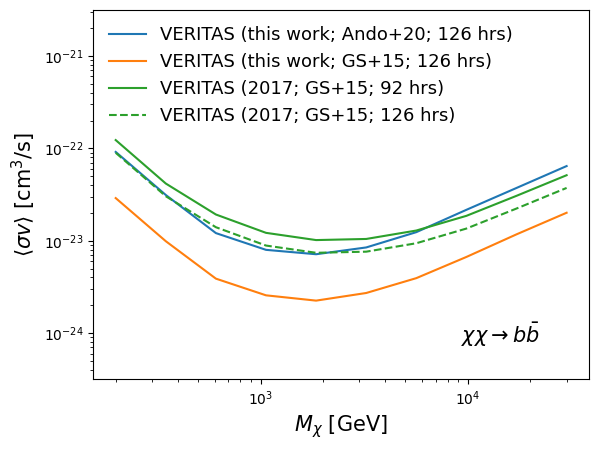

In [49]:
Likelihood.plotULcurve("for_comparision_segue_1_new_bbar", label="VERITAS (this work; Ando+20; 126 hrs)")
Likelihood.plotULcurve("for_comparision_segue_1_GS_bbar",     label="VERITAS (this work; GS+15; 126 hrs)")
Likelihood.plotULcurve("for_comparision_segue_1_old_bbar", label="VERITAS (2017; GS+15; 92 hrs)")
Likelihood.plotULcurve("for_comparision_segue_1_old_bbar", label="VERITAS (2017; GS+15; 126 hrs)", factor=126.29/92, ls="--", color="tab:green")

plt.legend(loc=2, fontsize=13, frameon=False)
ax = plt.gca()
plt.text(0.9, 0.1, r"$\chi\chi \rightarrow b\bar{b}$", fontsize=15, ha="right", transform=ax.transAxes)

plt.title("")
plt.grid(which="both", ls="")


plt.savefig("Segue_1_comparison_bbar.pdf")

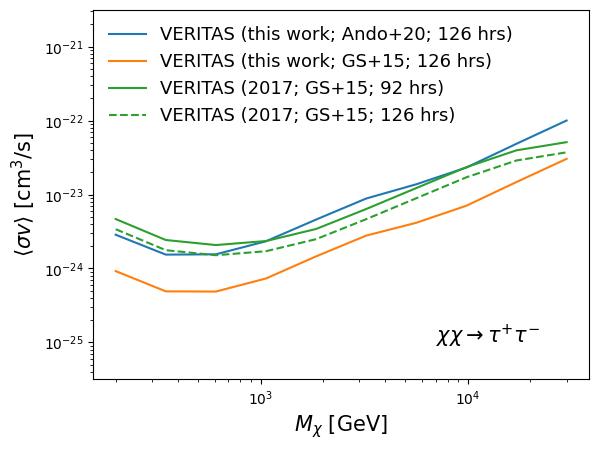

In [50]:
Likelihood.plotULcurve("for_comparision_segue_1_new", label="VERITAS (this work; Ando+20; 126 hrs)")
Likelihood.plotULcurve("for_comparision_segue_1_GS",     label="VERITAS (this work; GS+15; 126 hrs)")
Likelihood.plotULcurve("for_comparision_segue_1_old", label="VERITAS (2017; GS+15; 92 hrs)")
Likelihood.plotULcurve("for_comparision_segue_1_old", label="VERITAS (2017; GS+15; 126 hrs)", factor=126.29/92, ls="--", color="tab:green")
plt.legend(loc=2, fontsize=13, frameon=False)
ax = plt.gca()
plt.text(0.9, 0.1, r"$\chi\chi \rightarrow \tau^{+}\tau^{-}$", fontsize=15, ha="right", transform=ax.transAxes)

plt.title("")
plt.grid(which="both", ls="")
plt.savefig("Segue_1_comparison_tt.pdf")

In [ ]:
channel = "tt"
package="EventDisplay"
mass = np.geomspace(200, 3e4, 6)

for c in const.ListOfChannel:
    filename=f"EventDisplay_stacked_{c}_1D_gaus_final"
    OUTPUT = Likelihood.combinedUpperLimits(c, package=package, method=2, DM_spectra="PPPC", filename=filename,
                averagedIRF=True, bkgModel="gaus", mass=mass, dwarfs = const.ListOfDwarf,
                addTheta=False, version="all", ext=True, correction=True)

In [56]:
channel="nue"
filename=f"EventDisplay_stacked_{c}_1D_gaus_final"
OUTPUT = Likelihood.combinedUpperLimits(c, package=package, method=2, DM_spectra="PPPC", filename=filename,
            averagedIRF=True, bkgModel="gaus", mass=mass, dwarfs = const.ListOfDwarf,
            addTheta=False, version="all", ext=True, correction=True)

[Log] Package      : EventDisplay
[Log] # of Dwarfs  : 17
[Log] Channel      : nue
[Log] Dimention    : 1
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/12 [00:00<?, ?it/s]

[Log] Upper limits are saved in '/Users/dtak/Research/DarkMatter/Output/EventDisplay_stacked_nue_1D_gaus_final.npy'


Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: PointSpreadFunction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyDispersion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: EnergyBias (Po

In [3]:
np.load(const.OUTPUT_DIR+"/for_comparision_segue_1_new_bbar.npy")[:,0]

array([  200.        ,   348.99396209,   608.98392787,  1062.65856918,
        1854.30712203,  3235.70994724,  5646.21617329,  9852.47676563,
       17192.27451412, 30000.        ])

In [ ]:
Likelihood.plotExpULcurve("for_comparision_segue_1_new_bbar", label="VERITAS (this work; Ando+20; 126 hrs)")

In [6]:
dwarf = "Segue_1"
channel = "tt"
package="EventDisplay"

Likelihood.calcULSysError(dwarf, channel, package=package, method=2, ext=True, bkgModel="gaus", filename="for_comparision_segue_1_new_exp",
                        mass=np.load(const.OUTPUT_DIR+"/for_comparision_segue_1_new.npy")[:,0], addTheta=True, averagedIRF=True, useBias=True,
                        verbosity=True, runs=1000)

[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_1
[Log] Channel      : tt
[Log] Dimention    : 2
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/1000 [00:00<?, ?it/s]

[Log] Upper-limits (including sys. error) are saved in '/Users/dtak/Research/DarkMatter/Output/for_comparision_segue_1_new_exp.npy'


In [5]:
dwarf = "Segue_1"
channel = "bbar"
package="EventDisplay"

Likelihood.calcULSysError(dwarf, channel, package=package, method=2, ext=True, bkgModel="gaus", filename="for_comparision_segue_1_new_bbar_exp",
                        mass=np.load(const.OUTPUT_DIR+"/for_comparision_segue_1_new_bbar.npy")[:,0], addTheta=True, averagedIRF=True, useBias=True,
                        verbosity=True, runs=1000)

[Log] Package      : EventDisplay
[Log] Dwarf        : Segue_1
[Log] Channel      : bbar
[Log] Dimention    : 2
[Log] Background   : Gaussian (gaus)
[Log] Dispersion   : Etr vs ratio
[Log] Minimum mass : 200 GeV
[Log] Maximum mass : 30 TeV


  0%|          | 0/1000 [00:00<?, ?it/s]

[Log] Upper-limits (including sys. error) are saved in '/Users/dtak/Research/DarkMatter/Output/for_comparision_segue_1_new_bbar_exp.npy'


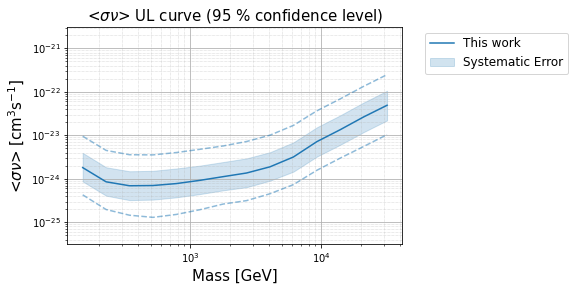

In [120]:
Likelihood.plotULcurve("EventDisplay_segue_1_tt_2D_ex", label="This work")
Likelihood.plotExpULcurve(filename="EventDisplay_segue_1_tt_2D_sys.npy", label="Systematic Error", color="tab:blue")

In [27]:
#mass = np.logspace(np.log10(200), np.log10(30000), 6)
mass = np.logspace(np.log10(1e5), np.log10(3e7), 3)

package="EventDisplay"

for channel in["tt","bbar"]:
    for dwarf in tqdm(["Segue_1", "UMa_II", "UMi"]):
        jSeed=defaultNum[dwarf]
        filename=f"EventDisplay_exp_{dwarf}_{channel}_high"
        Likelihood.calcExpectedLimits(dwarf, channel, mass=mass, package=package, method=2, averagedIRF=True,
                                    DM_spectra="HDM",filename=filename,
                                    jArray=True, jSeed=jSeed, addTheta=False, version="all", 
                                      ext=True, bkgModel="gaus",correction=True, runs=1000,
                                      useBias=True, verbosity=0)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 2 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 2 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 2 VARIABLE PARAMETERS.
          VERIFY THAT STEP SIZES ARE BIG ENOUGH AND CHECK FCN LOGIC.
 *******************************************************************************
 *******************************************************************************
  FUNCTION VALUE DOES NOT SEEM TO DEPEND ON ANY OF THE 2 VARIABLE PARAMET

In [28]:
for dwarf in ["Segue_1", "UMa_II", "UMi"]:
    for channel in ["tt", "bbar"]:

        u = np.load(const.OUTPUT_DIR+f"EventDisplay_exp_{dwarf}_{channel}_high.npy", allow_pickle=True).item()
        l = np.load(const.OUTPUT_DIR+f"EventDisplay_exp_{dwarf}_{channel}_low.npy", allow_pickle=True).item()
        for key in u.keys():
            l[key] = u[key]
        np.save(const.OUTPUT_DIR+f"EventDisplay_exp_{dwarf}_{channel}.npy", l)

In [17]:
for channel in const.ListOfChannel:
    for dwarf in const.ListOfDwarf:

        u = np.load(const.OUTPUT_DIR+f"EventDisplay_{dwarf}_{channel}_high.npy")
        l = list(np.load(const.OUTPUT_DIR+f"EventDisplay_{dwarf}_{channel}_low.npy"))
        for tmp in u:
            l.append(tmp)
        np.save(const.OUTPUT_DIR+f"EventDisplay_{dwarf}_{channel}.npy", l)

ValueError: Object arrays cannot be loaded when allow_pickle=False

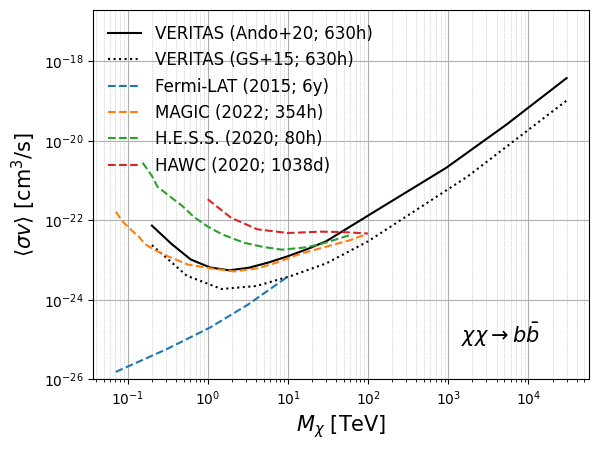

In [61]:
Likelihood.plotULcurve(f"stacked_combined_bbar_low", add_input=f"stacked_combined_bbar_high", units="TeV", label="VERITAS (Ando+20; 630h)", color="black")
Likelihood.plotULcurve(f"EventDisplay_combined_bbar_factor", units="TeV", label="VERITAS (GS+15; 630h)", color="black", ls=":")
Likelihood.plotPublication("bbar", units="TeV", textloc=0.1)
ax=plt.gca()
plt.grid(which="minor", axis="y", ls="")
plt.legend(loc=2, frameon=False, fontsize=12, ncols=1)
plt.title("")
plt.ylim(1e-26, 2e-17)
plt.savefig("publication_bbar.pdf")

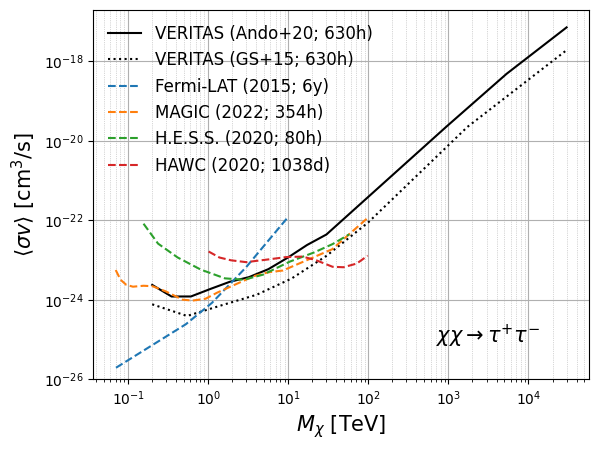

In [60]:
Likelihood.plotULcurve(f"stacked_combined_tt_low", add_input=f"stacked_combined_tt_high", units="TeV", label="VERITAS (Ando+20; 630h)", color="black")
Likelihood.plotULcurve(f"EventDisplay_combined_tt_factor", units="TeV", label="VERITAS (GS+15; 630h)", color="black", ls=":")
Likelihood.plotPublication("tt", units="TeV", textloc=0.1)
ax=plt.gca()
plt.grid(which="minor", axis="y", ls="")
plt.legend(loc=2, frameon=False, fontsize=12)
plt.title("")
plt.ylim(1e-26, 2e-17)
plt.savefig("publication_tt.pdf")

In [1]:

for dwarf, dl in zip(const.ListOfDwarf, const.ListOfDwarfLabel):
    for i, (channel, cl) in enumerate(zip(["tt", "bbar"],\
                                          [const.ListOfChannelLabel["tt"], const.ListOfChannelLabel["bbar"]])):
        l = r"$\chi\chi \rightarrow$ {}".format(cl)
        Likelihood.plotULcurve(f"EventDisplay_{dwarf}_{channel}", label=r"{}".format(l), 
                               units="TeV", addRelic=bool(True*i), color=f"C{i}")
        
        Likelihood.plotExpULcurve(f"EventDisplay_exp_{dwarf}_{channel}", units="TeV", color=f"C{i}")
    plt.ylim(8e-27, )
    plt.legend(loc=2, fontsize=11, frameon=False)
    plt.title("")
    
    if dl == r"B\"ootes":
        plt.text(2e4, 1e-24, r"B$\"o$otes", fontsize=12, ha="right")
    else:
        plt.text(2e4, 1e-24, dl, fontsize=12, ha="right")
    plt.grid(which="both", ls="")
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', labelsize=13)
    plt.tight_layout()
    plt.savefig("comp_"+dwarf+".pdf")
    
    plt.show()

NameError: name 'const' is not defined

In [ ]:
dwarf = "Segue_1"
channel = "tt"
mass = np.logspace(np.log10(200), 4.5, 8)
package="EventDisplay"
#filename = "comp_
jSeed=defaultNum[dwarf]
uls = []
for i in trange(300):
#    jSeed = np.random.randint(0, 99999)
    filename = "EventDisplay_Segue_1_tt_1D"
    ul = Likelihood.calcUpperLimits(dwarf, channel, mass=mass, package=package, method=2, averagedIRF=True,
                                    filename="EventDisplay_Segue_1_tt_1D_test",
                                  jArray=True, jSeed=jSeed, addTheta=False, version="all", ext=True, bkgModel="gaus",
                                  useBias=True, verbosity=0, returnUL=True, write=True, events=events,
                                  N_on= N_on_poi, hOn=hOn, expectedLimit=True)
    uls.append(ul)